In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# plot 한글출력
plt.rcParams['font.family'] = 'NanumGothic'

In [4]:
# warning message 제거
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('../01.Data_Collection/films.csv')

print(df.shape)
df.sample()

(810, 38)


,순위,영화명,영화코드,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,F-rated,감독,대표감독,감독코드,감독성별,감독_대표역할,감독필모,작가,대표작가,대표작가(필명),작가코드,작가성별,작가_대표역할,작가필모,배우,주연배우,배역명,배우코드,배우성별,배우_대표역할,배우필모
671,57.0,그대 이름은 장미,20166602,2019.1.16,"735,782,970",0.1%,"748,806,970","88,054","89,238",540,"7,704",한국,한국,(주)엠씨엠씨,(주)리틀빅픽쳐스,12세이상관람가,코미디,2,조석현,조석현,20130878.0,남자,감독,그대 이름은 장미|은밀하게 위대하게|쌍화점|라듸오 데이즈|뚝방전설,홍은미,홍은미,홍은미,20215526.0,여자,시나리오(각본),그대 이름은 장미|미씽: 사라진 여자,"유호정,박성웅,오정세,채수빈,하연수,이원근,최우식,이지민",유호정,NaN,20111253.0,여자,배우,그대 이름은 장미|써니 감독판|써니|오원 장승업 취화선|취화선|산책|키스할까요


In [6]:
df.dtypes

순위          float64
영화명          object
영화코드          int64
개봉일          object
매출액          object
매출액점유율       object
누적매출액        object
관객수          object
누적관객수        object
스크린수         object
상영횟수         object
대표국적         object
국적           object
제작사          object
배급사          object
등급           object
장르           object
F-rated       int64
감독           object
대표감독         object
감독코드        float64
감독성별         object
감독_대표역할      object
감독필모         object
작가           object
대표작가         object
대표작가(필명)     object
작가코드        float64
작가성별         object
작가_대표역할      object
작가필모         object
배우           object
주연배우         object
배역명          object
배우코드        float64
배우성별         object
배우_대표역할      object
배우필모         object
dtype: object

In [7]:
# corr 보기 위해 숫자로 표현된 컬럼만 남기기 + 식별을 위해 영화명, 영화코드 포함
df_in_digit = df[['영화명', '영화코드', '개봉일', '매출액', '매출액점유율', '누적매출액', '관객수', '누적관객수', '스크린수', '상영횟수', 'F-rated']]
df_in_digit = df_in_digit[df_in_digit['개봉일'].notnull()]
print(df_in_digit.isnull().sum())
print(df_in_digit.shape)
df_in_digit.sample()

영화명        0
영화코드       0
개봉일        0
매출액        0
매출액점유율     0
누적매출액      0
관객수        0
누적관객수      0
스크린수       0
상영횟수       0
F-rated    0
dtype: int64
(808, 11)


,영화명,영화코드,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,F-rated
32,화장,20133682,2015.4.9,"1,073,035,100",0.1%,"1,073,964,100","142,382","142,519",327,"13,811",1


In [8]:
# 컬럼 dtype 변경
# 매출액, 매출액점유율, 누적매출액, 관객수, 누적관객수, 스크린수, 상영횟수 -> int
columns = ['매출액', '매출액점유율', '누적매출액', '관객수', '누적관객수', '스크린수', '상영횟수']

for c in columns:
    print(c)
    print(df_in_digit[c].dtype)
    if c == '매출액점유율': df_in_digit[c] = df_in_digit[c].apply(lambda x: float(x.replace('%','')))
    else:
        df_in_digit[c] = df_in_digit[c].apply(lambda x: int(x.replace(',', '').replace('%','')))
    
df_in_digit.dtypes

매출액
object
매출액점유율
object
누적매출액
object
관객수
object
누적관객수
object
스크린수
object
상영횟수
object


영화명         object
영화코드         int64
개봉일         object
매출액          int64
매출액점유율     float64
누적매출액        int64
관객수          int64
누적관객수        int64
스크린수         int64
상영횟수         int64
F-rated      int64
dtype: object

In [9]:
df_in_digit['개봉일'] = pd.to_datetime(df_in_digit['개봉일'])
df_in_digit['year'] = pd.to_datetime(df_in_digit['개봉일']).dt.year
df_in_digit['month'] = pd.to_datetime(df_in_digit['개봉일']).dt.month
df_in_digit['day'] = pd.to_datetime(df_in_digit['개봉일']).dt.day
df_in_digit['dayofweek'] = pd.to_datetime(df_in_digit['개봉일']).dt.dayofweek

In [10]:
df_in_digit.corr()

,영화코드,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,F-rated,year,month,day,dayofweek
영화코드,1.000000,-0.019480,-0.009277,-0.019463,-0.027762,-0.027733,0.058139,-0.003340,0.005204,0.801542,0.033228,-0.001021,-0.090417
매출액,-0.019480,1.000000,0.997869,1.000000,0.999190,0.999192,0.776339,0.944985,-0.130232,0.013476,0.015759,-0.029194,-0.286490
매출액점유율,-0.009277,0.997869,1.000000,0.997875,0.995656,0.995667,0.772840,0.945209,-0.129896,0.025950,0.010284,-0.024255,-0.283503
누적매출액,-0.019463,1.000000,0.997875,1.000000,0.999187,0.999190,0.776384,0.945012,-0.130200,0.013537,0.015649,-0.029256,-0.286543
관객수,-0.027762,0.999190,0.995656,0.999187,1.000000,0.999999,0.775784,0.942876,-0.130056,0.003467,0.017222,-0.028603,-0.286909
누적관객수,-0.027733,0.999192,0.995667,0.999190,0.999999,1.000000,0.775841,0.942915,-0.130003,0.003546,0.017092,-0.028675,-0.286970
스크린수,0.058139,0.776339,0.772840,0.776384,0.775784,0.775841,1.000000,0.876827,-0.132729,0.130484,-0.011587,-0.002000,-0.447734
상영횟수,-0.003340,0.944985,0.945209,0.945012,0.942876,0.942915,0.876827,1.000000,-0.124674,0.048943,-0.014570,-0.020723,-0.347923
F-rated,0.005204,-0.130232,-0.129896,-0.130200,-0.130056,-0.130003,-0.132729,-0.124674,1.000000,0.050735,-0.019629,0.005634,0.061839
year,0.801542,0.013476,0.025950,0.013537,0.003467,0.003546,0.130484,0.048943,0.050735,1.000000,-0.126272,0.030652,-0.158594


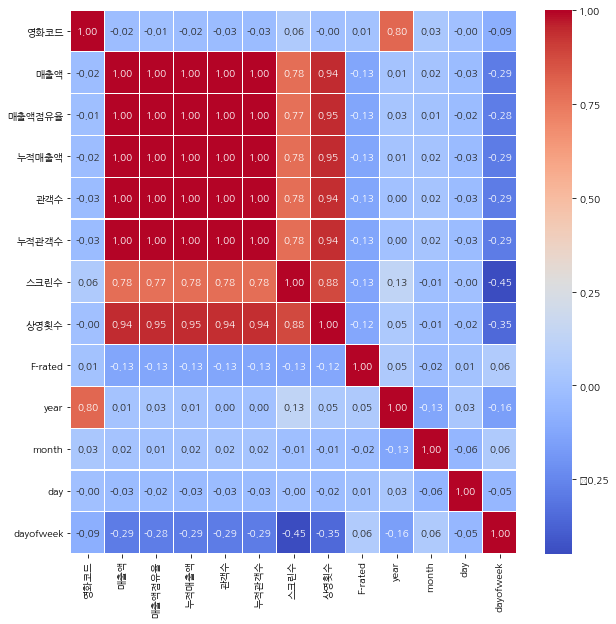

In [11]:
plt.figure(figsize=[10, 10])
sns.heatmap(df_in_digit.corr(), annot=True, fmt = '.2f', linewidths=0.2, cmap='coolwarm')

### 상영횟수 분포

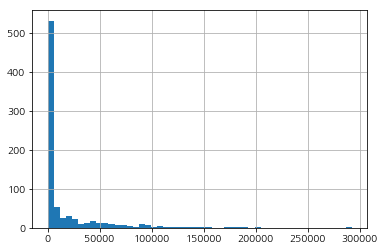

In [12]:
df_in_digit['상영횟수'].hist(bins=50)

In [13]:
df.columns

Index(['순위', '영화명', '영화코드', '개봉일', '매출액', '매출액점유율', '누적매출액', '관객수', '누적관객수',
       '스크린수', '상영횟수', '대표국적', '국적', '제작사', '배급사', '등급', '장르', 'F-rated', '감독',
       '대표감독', '감독코드', '감독성별', '감독_대표역할', '감독필모', '작가', '대표작가', '대표작가(필명)',
       '작가코드', '작가성별', '작가_대표역할', '작가필모', '배우', '주연배우', '배역명', '배우코드', '배우성별',
       '배우_대표역할', '배우필모'],
      dtype='object')

In [14]:
df_in_digit['상영횟수(log)'] = df_in_digit['상영횟수'].apply(lambda x: np.log(x))

df_in_digit.sample()

,영화명,영화코드,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,F-rated,year,month,day,dayofweek,상영횟수(log)
133,세상끝의 사랑,20158701,2015-11-12,37203300,0.0,37203300,4746,4746,97,929,1,2015,11,12,3,6.834109


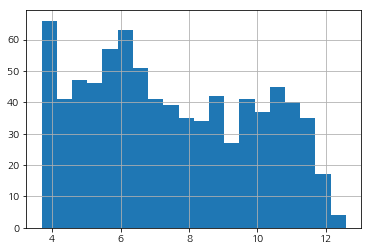

In [15]:
df_in_digit['상영횟수(log)'].hist(bins=20)

### 스크린수 분포

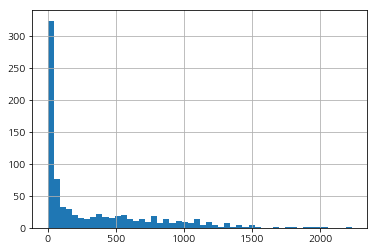

In [16]:
df_in_digit['스크린수'].hist(bins=50)

In [17]:
df_in_digit['스크린수(log)'] = df_in_digit['스크린수'].apply(lambda x: np.log(x))

df_in_digit.sample()

,영화명,영화코드,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,F-rated,year,month,day,dayofweek,상영횟수(log),스크린수(log)
654,아메리카 타운,20170001,2018-12-06,1197000,0.0,1197000,203,203,7,65,0,2018,12,6,3,4.174387,1.94591


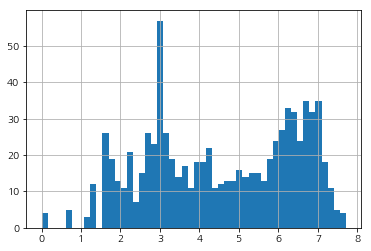

In [18]:
df_in_digit['스크린수(log)'].hist(bins=50)

스크린수보다 상영횟수가 더 불균형함

### 상영횟수(log) 기준으로 나누기
상영횟수(log) | 상영횟수 등급
-|-
0 < x <= 2 | 1
2 < x <= 4 | 2
4 < x <= 6 | 3
6 < x <= 8 | 4
8 < x <= 10 | 5
10 < x <= 12 | 6

In [19]:
df_in_digit[df_in_digit['상영횟수(log)'] == 0]

,영화명,영화코드,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,F-rated,year,month,day,dayofweek,상영횟수(log),스크린수(log)


In [20]:
df_in_digit.loc[df_in_digit['상영횟수(log)'] <= 12, '상영횟수등급'] = 6
df_in_digit.loc[df_in_digit['상영횟수(log)'] <= 10, '상영횟수등급'] = 5
df_in_digit.loc[df_in_digit['상영횟수(log)'] <= 8, '상영횟수등급'] = 4
df_in_digit.loc[df_in_digit['상영횟수(log)'] <= 6, '상영횟수등급'] = 3
df_in_digit.loc[df_in_digit['상영횟수(log)'] <= 4, '상영횟수등급'] = 2
df_in_digit.loc[df_in_digit['상영횟수(log)'] <= 2, '상영횟수등급'] = 1

df_in_digit.sample()

,영화명,영화코드,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,F-rated,year,month,day,dayofweek,상영횟수(log),스크린수(log),상영횟수등급
531,엄마의 공책,20164389,2018-03-15,67499500,0.0,68175500,10102,10187,75,1253,2,2018,3,15,3,7.133296,4.317488,4.0


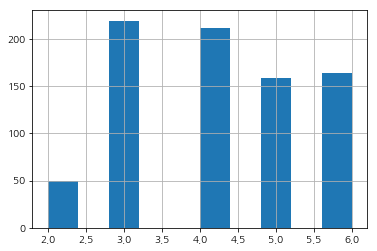

In [21]:
df_in_digit['상영횟수등급'].hist()

In [22]:
df_in_digit[df_in_digit['상영횟수등급'] == 6]['영화명']

2                   허삼관
3                오늘의 연애
7               강남 1970
14                  쎄시봉
15     조선명탐정 : 사라진 놉의 딸
20               순수의 시대
21                  헬머니
23                 살인의뢰
27                   스물
33                 장수상회
40                차이나타운
48               악의 연대기
51                   간신
52                  무뢰한
61                 극비수사
63                 연평해전
70                   손님
86               미쓰 와이프
89              뷰티 인사이드
101                  사도
106          탐정 : 더 비기닝
110              성난 변호사
119           특종: 량첸살인기
120                 더 폰
124                그놈이다
129              검은 사제들
138                내부자들
140          열정같은소리하고있네
157                  대호
158                히말라야
             ...       
661                스윙키즈
662                 마약왕
665           PMC: 더 벙커
667                 말모이
668              내안의 그놈
677                  뺑반
681                  증인
683                 사바하
685          항거:유관순 이야기
695                   돈
696             

상영횟수log 컬럼으로 등급을 나눴더니, log 스케일의 특성에 따라 상영횟수가 늘어날수록 차이가 큰 영화들이 같은 등급 내 포함된다

-> 상영횟수 칼럼으로 다시 나눠서 보기

상영횟수 | 상영횟수 등급
-|-
0 < x <= 100 | 1
2 < x <= 1000 | 2
4 < x <= 10_000 | 3
6 < x <= 30_000 | 4
8 < x <= 70_000 | 5
10 < x <= 100_000 | 6

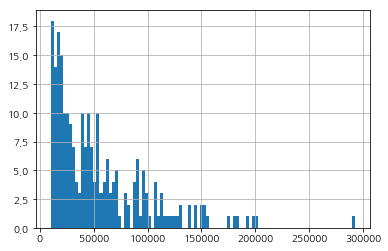

In [23]:
df_in_digit[df_in_digit['상영횟수'] > 10000]['상영횟수'].hist(bins=100)

In [24]:
df_in_digit[df_in_digit['상영횟수'] > 150_000]

,영화명,영화코드,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,F-rated,year,month,day,dayofweek,상영횟수(log),스크린수(log),상영횟수등급
75,암살,20148851,2015-07-22,98463132781,11.2,98463132781,12705700,12705700,1519,175185,1,2015,7,22,2,12.073598,7.325808,NaN
79,베테랑,20148048,2015-08-05,105168155250,12.0,105168155250,13414009,13414009,1115,199231,0,2015,8,5,2,12.202220,7.016610,NaN
138,내부자들,20149314,2015-11-19,56465665657,6.4,56465665657,7055332,7055332,1129,152265,0,2015,11,19,3,11.933378,7.029088,6.0
178,검사외전,20145507,2016-02-03,77320403264,8.3,77320403264,9707581,9707581,1812,153532,0,2016,2,3,2,11.941664,7.502186,6.0
259,부산행,20156564,2016-07-20,93178283048,10.0,93178283048,11565479,11565479,1788,151315,0,2016,7,20,2,11.927119,7.488853,6.0
295,럭키,20153444,2016-10-13,56444461256,6.1,56444461256,6975290,6975290,1234,155977,0,2016,10,13,3,11.957464,7.118016,6.0
416,택시운전사,20162869,2017-08-02,95853645649,10.6,95853645649,12186327,12186327,1906,184075,1,2017,8,2,2,12.123099,7.552762,NaN
592,신과함께-인과 연,20186202,2018-08-01,102666146909,11.2,102666146909,12274996,12274996,2235,179981,0,2018,8,1,2,12.100607,7.711997,NaN
674,극한직업,20182530,2019-01-23,139648179516,17.6,139648179516,16264984,16264984,2003,292577,0,2019,1,23,2,12.586483,7.602401,NaN
732,기생충,20183782,2019-05-30,85865256245,10.8,85865256245,10083103,10083103,1948,192830,0,2019,5,30,3,12.169564,7.574558,NaN


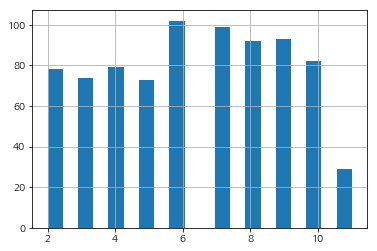

In [25]:
# 간격 줄이기
df_in_digit.loc[df_in_digit['상영횟수'] <= 100_000, '상영횟수등급'] = 11
df_in_digit.loc[df_in_digit['상영횟수'] <= 70_000, '상영횟수등급'] = 10
df_in_digit.loc[df_in_digit['상영횟수'] <= 30_000, '상영횟수등급'] = 9
df_in_digit.loc[df_in_digit['상영횟수'] <= 10_000, '상영횟수등급'] = 8
df_in_digit.loc[df_in_digit['상영횟수'] <= 3_000, '상영횟수등급'] = 7
df_in_digit.loc[df_in_digit['상영횟수'] <= 1_000, '상영횟수등급'] = 6
df_in_digit.loc[df_in_digit['상영횟수'] <= 500, '상영횟수등급'] = 5
df_in_digit.loc[df_in_digit['상영횟수'] <= 300, '상영횟수등급'] = 4
df_in_digit.loc[df_in_digit['상영횟수'] <= 150, '상영횟수등급'] = 3
df_in_digit.loc[df_in_digit['상영횟수'] <= 70, '상영횟수등급'] = 2
df_in_digit.loc[df_in_digit['상영횟수'] <= 30, '상영횟수등급'] = 1

df_in_digit['상영횟수등급'].hist(bins=20)

In [26]:
df_in_digit.groupby(['상영횟수등급'])['F-rated'].mean()

상영횟수등급
2.0     0.615385
3.0     0.554054
4.0     0.556962
5.0     0.863014
6.0     0.666667
7.0     0.898990
8.0     0.771739
9.0     0.602151
10.0    0.548780
11.0    0.586207
Name: F-rated, dtype: float64

에로영화가 많은 2~4등급을 지나면 F-rated 가 올라가다가 8등급을 기점으로 다시 줄어든다

In [27]:
df.columns

Index(['순위', '영화명', '영화코드', '개봉일', '매출액', '매출액점유율', '누적매출액', '관객수', '누적관객수',
       '스크린수', '상영횟수', '대표국적', '국적', '제작사', '배급사', '등급', '장르', 'F-rated', '감독',
       '대표감독', '감독코드', '감독성별', '감독_대표역할', '감독필모', '작가', '대표작가', '대표작가(필명)',
       '작가코드', '작가성별', '작가_대표역할', '작가필모', '배우', '주연배우', '배역명', '배우코드', '배우성별',
       '배우_대표역할', '배우필모'],
      dtype='object')

In [30]:
# df_in_digit = df_in_digit.merge(df[['영화코드', '장르']], how='left', on='영화코드')
# df_in_digit = df_in_digit.merge(df[['영화코드', '등급']], how='left', on='영화코드')
# df_in_digit = df_in_digit.drop(['장르_x', '장르_y'], axis=1)

# df_in_digit[df_in_digit['상영횟수등급'] == 2]['장르'].value_counts()
# df_in_digit[df_in_digit['상영횟수등급'] == 2][['영화명', '장르']]

df_in_digit[df_in_digit['상영횟수등급'] == 2]['등급'].value_counts()
df_in_digit.groupby(['상영횟수등급', '등급'])['영화명'].size()

상영횟수등급  등급      
2.0     12세이상관람가    13
        15세이상관람가    18
        전체관람가        6
        청소년관람불가     41
3.0     12세이상관람가    21
        15세이상관람가    16
        전체관람가       11
        청소년관람불가     26
4.0     12세이상관람가    20
        15세이상관람가    30
        전체관람가        9
        청소년관람불가     20
5.0     12세이상관람가    26
        15세이상관람가    23
        전체관람가       19
        청소년관람불가      5
6.0     12세이상관람가    27
        15세이상관람가    40
        전체관람가       28
        청소년관람불가      7
7.0     12세이상관람가    20
        15세이상관람가    30
        전체관람가       34
        청소년관람불가     15
8.0     12세이상관람가    15
        15세이상관람가    41
        전체관람가       24
        청소년관람불가     12
9.0     12세이상관람가    21
        15세이상관람가    44
        전체관람가       14
        청소년관람불가     14
10.0    12세이상관람가    21
        15세이상관람가    44
        전체관람가        3
        청소년관람불가     14
11.0    12세이상관람가    16
        15세이상관람가     9
        전체관람가        1
        청소년관람불가      3
Name: 영화명, dtype: int64

<Figure size 1152x432 with 0 Axes>

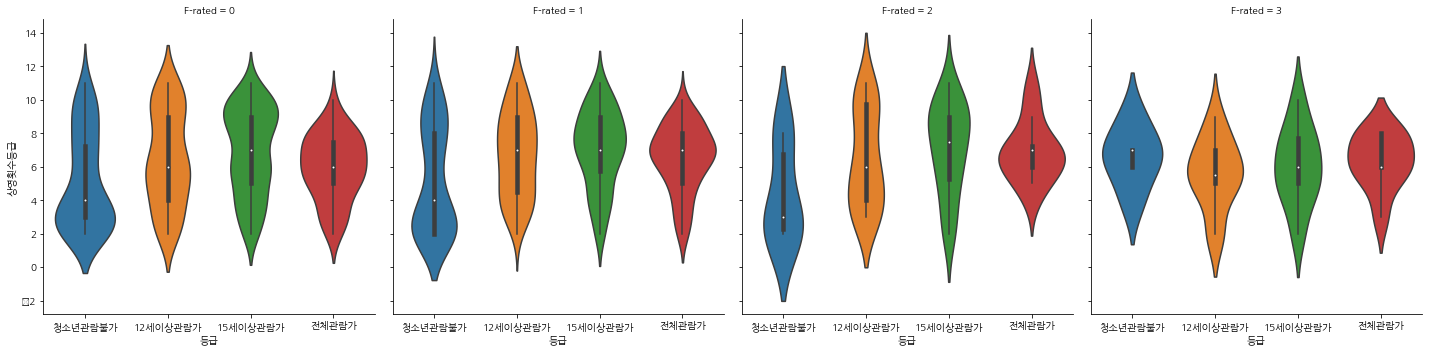

In [31]:
plt.figure(figsize=[16, 6])

sns.catplot(x='등급', col='F-rated', y='상영횟수등급',kind='violin', data=df_in_digit)
plt.show()

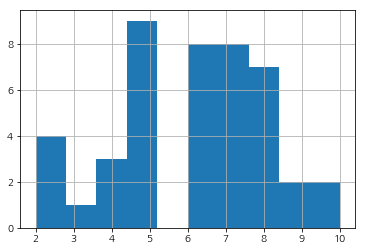

In [32]:
df_in_digit[df_in_digit['F-rated'] == 3]['상영횟수등급'].hist()

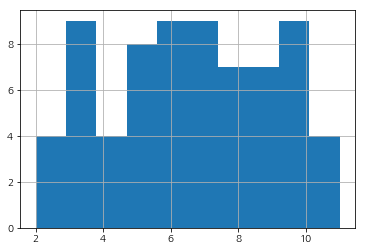

In [33]:
df_in_digit[df_in_digit['F-rated'] == 2]['상영횟수등급'].hist()

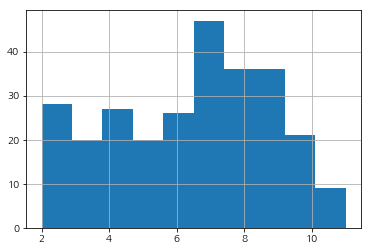

In [34]:
df_in_digit[df_in_digit['F-rated'] == 1]['상영횟수등급'].hist()

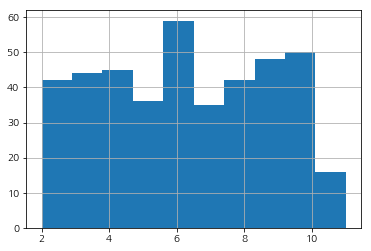

In [35]:
df_in_digit[df_in_digit['F-rated'] == 0]['상영횟수등급'].hist()

# 작가 Null 값
직접 검색해서 채우기

In [42]:
data = df[df['장르'] != '다큐멘터리']
# data=df
print(data['작가'].isnull().sum())
data[data['작가'].isnull()][['개봉일', '영화명', '감독', '배우']]

81


,개봉일,영화명,감독,배우
8,2015.1.22,생각보다 맑은,한지원,"엄상현,양정화,한지원,한지원,이홍수,이홍수,이홍수,이호민,이영기,유아람,서정원,서정원"
26,2015.3.19,태양을 쏴라,김태식,"강지환,윤진서,박정민,안석환,윤성준"
63,2015.6.24,연평해전,김학순,"김무열,진구,김율호,이현우,이완,이청아,천민희,이한종,박찬희,박혜준,최순조,최승준,..."
94,2015.9.10,젊은 처제,이세종,"고원,곽한구,허민영,원성진,노진수"
99,2015.9.10,제 7기사단,키리야 카즈아키,"클라이브 오웬,모건 프리먼,안성기,엑셀 헨니,최재현,장한별,장영주,김선웅,이상민,박..."
108,2015.10.1,포장마차,최율권희,이채담
111,2015.10.14,유부녀들,경석호,"김소현,김하늘"
115,2015.10.22,맛있는 비행,전병철,"손덕기,정유진,신유주"
116,2015.10.22,오디세오,정성복,-
131,2015.11.12,나도 때론 포르노그라피의 주인공이고 싶다,장성수,"최리호,김영근,서갑숙,한지은"


In [44]:
data[data['작가'].isnull()][['개봉일', '영화명', '감독', '배우']].to_csv('../01.Data_Collection/writer_Null.csv', index=False, encoding='euc-kr')

# 감독 Null 값

In [45]:
data=df
print(data['대표감독'].isnull().sum())
data[data['대표감독'].isnull()][['개봉일', '영화명', '감독', '배우']]

24


,개봉일,영화명,감독,배우
89,2015.8.20,뷰티 인사이드,백,"한효주,김대명,도지한,배성우,박신혜,이범수,박서준,김상호,천우희,우에노 주리,이재준..."
90,2015.8.27,치외법권,신동엽,"임창정,최다니엘,임은경,장광,이경영,문제영,정한비,박영진,임정아,박일우,정형석,조원..."
147,2015.12.3,감금의 시간,김대성,"전유진,허동원,김윤재,이용주"
188,2016.2.24,귀향,조정래,"손숙,강하나,서미지,최리,정인기,오지혜,김시은,이채현,임성철,임혜영,박주현,박지희,..."
210,2016.4.5,입영전야,유승택,"임형순,이도현,이선영,이소영,이윤희"
228,2016.5.12,배짱이들,정훈,"이인세,강백수,최휘찬,송형준,정솔,문용일,이경호,이국현,김균현,김두복,김병진,김진규"
234,2016.5.19,계춘할망,창,"윤여정,김고은,김희원,신은정,최민호,류준열,양익준,박민지,남태부,강경탁,안지혜,이상..."
264,2016.8.10,터널,김성훈,"하정우,배두나,오달수,김종수,임한빈,정민희,송민석,윤성민,이동진,이상희,최춘범,권승..."
272,2016.8.25,최악의 하루,김종관,"한예리,이와세 료,권율,이희준,이승연,강 숙,최유화,이승연"
284,2016.9.22,대결,신동엽,"이주승,오지호,이정진,신정근,손은서,임효우,박주혜,박준범,전혜인,이규희,이대겸,조훈..."


In [47]:
data[data['대표감독'].isnull()][['개봉일', '영화명', '감독', '배우']].to_csv('../01.Data_Collection/director_Null.csv', index=False, encoding='euc-kr')